In [38]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder

In [10]:
#Load the dataset 
df = pd.read_csv("Iris.csv") 
# Quick look 
print("Dataset Shape:", df.shape) 
print("\nFirst 5 rows:\n", df.head())

Dataset Shape: (150, 6)

First 5 rows:
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [12]:
#Exploratory Data Analysis
print("\nDataset Info:\n") 
print(df.info()) 
print("\nClass distribution:\n", df["Species"].value_counts())


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Class distribution:
 Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [40]:
print(f'Total Number of Unique Species: {df.Species.nunique()}')
print(f'Unique Species: {df.Species.unique()}')

Total Number of Unique Species: 3
Unique Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


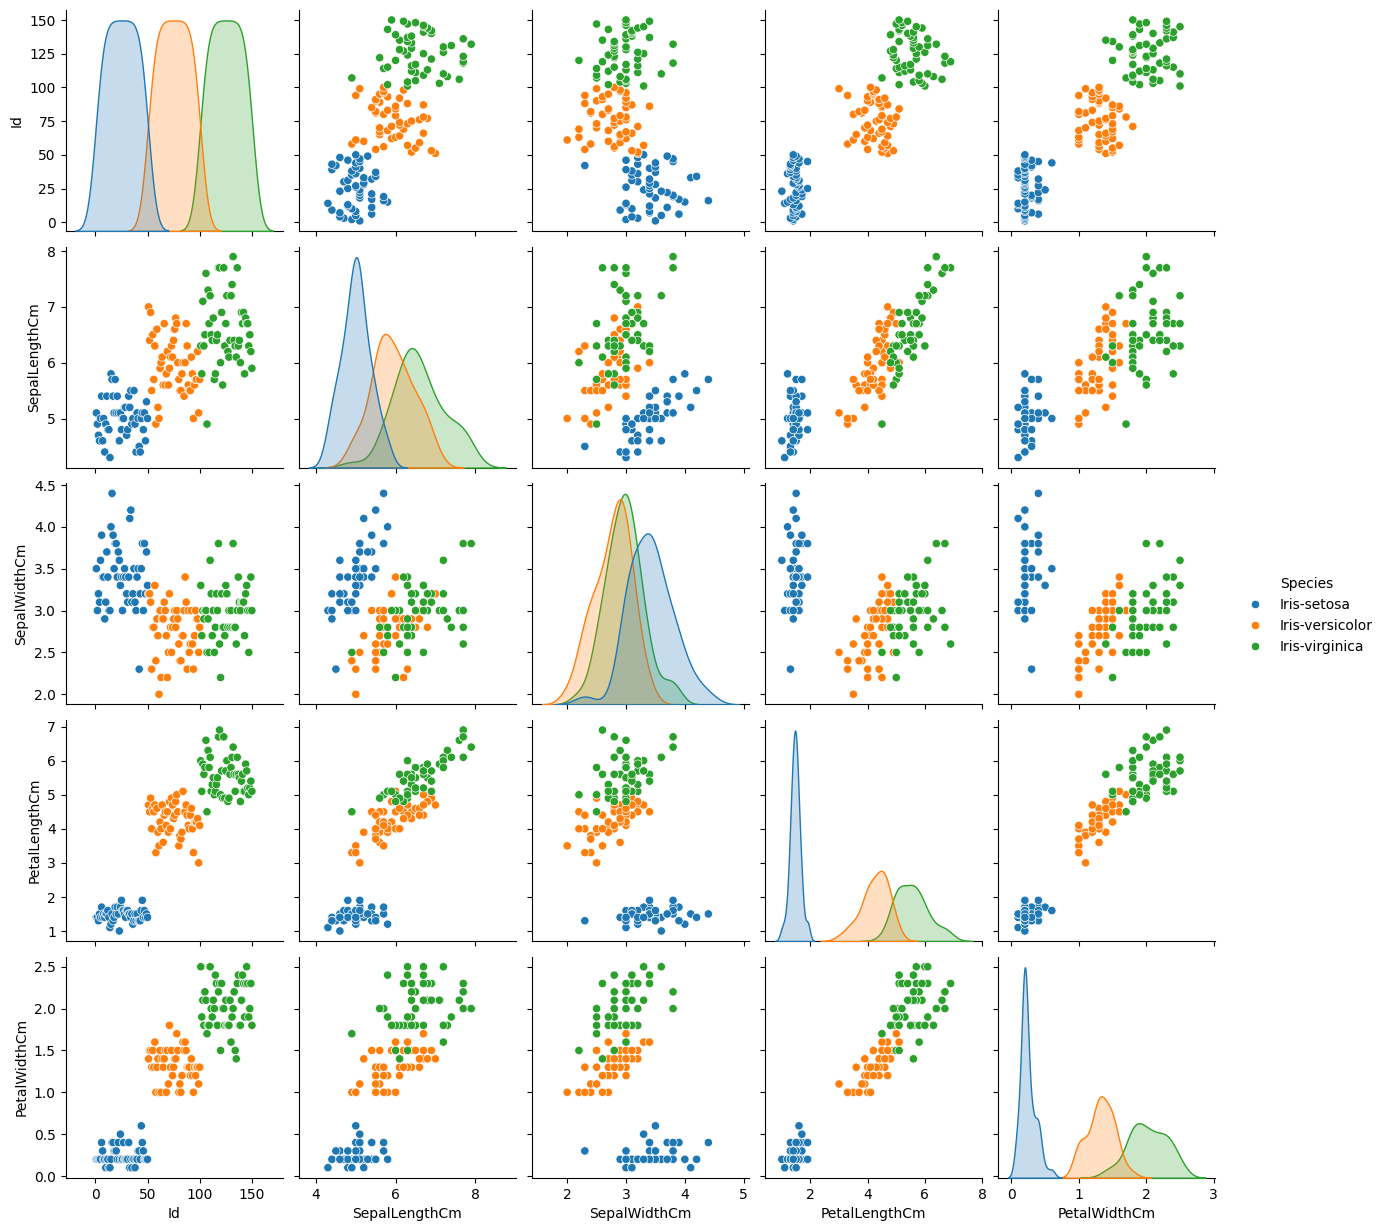

In [13]:
#Pairplot to visualize feature distribution 
sns.pairplot(df, hue="Species", diag_kind="kde") 
plt.show()

Text(0.5, 1.0, 'Length of the sepal (in Centimeters) Grouped by Species')

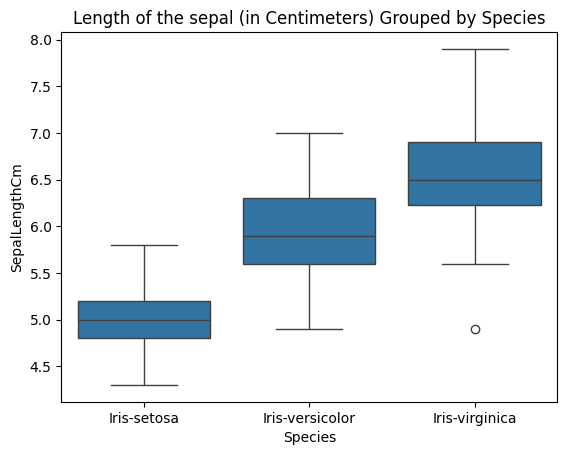

In [41]:
sns.boxplot(x='Species', y='SepalLengthCm', data=df).set_title('Length of the sepal (in Centimeters) Grouped by Species')

Text(0.5, 1.0, 'Length of the Sepal (in cm)')

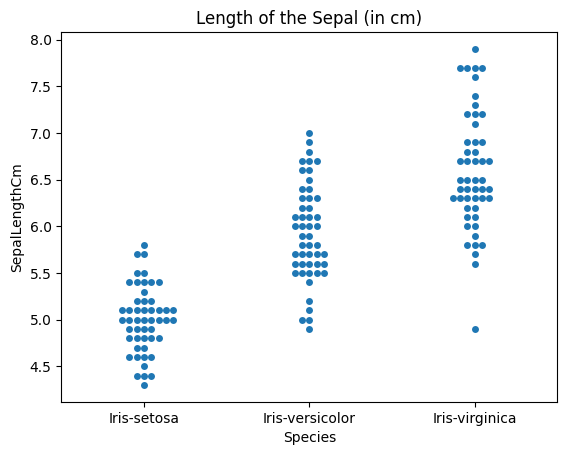

In [42]:
sns.swarmplot(x='Species', y='SepalLengthCm', data=df).set_title('Length of the Sepal (in cm)')

Text(0.5, 1.0, 'Length of the Sepal (in cm)')

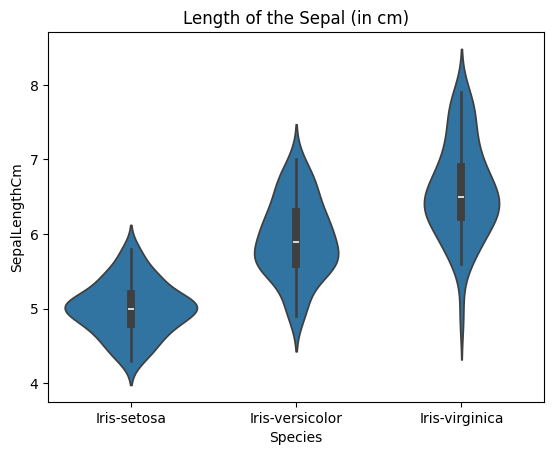

In [43]:
sns.violinplot(x='Species', y='SepalLengthCm', data=df).set_title('Length of the Sepal (in cm)')

Text(0.5, 1.0, 'Width of the Sepal (in cm)')

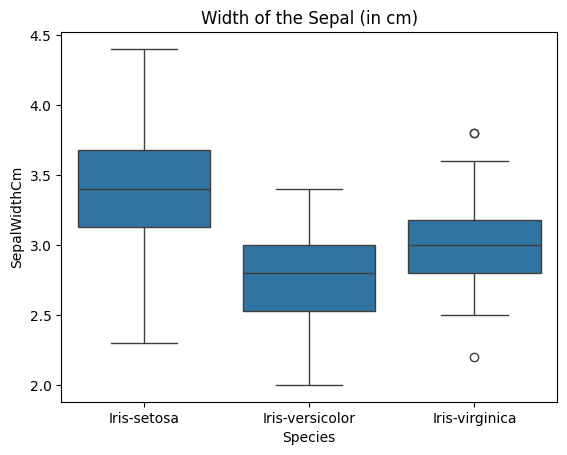

In [44]:
sns.boxplot(x='Species', y='SepalWidthCm', data=df).set_title('Width of the Sepal (in cm)')

Text(0.5, 1.0, 'Width of the Sepal (in cm)')

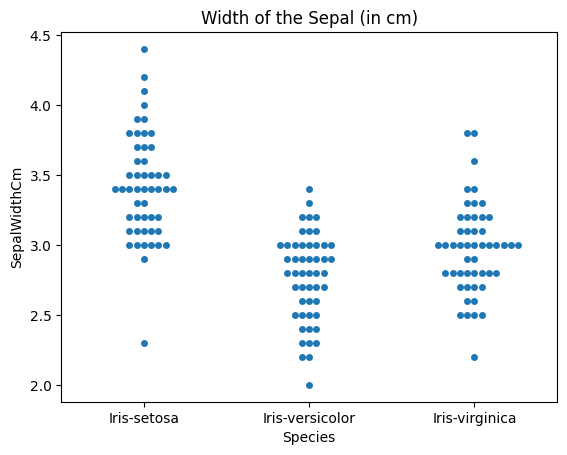

In [45]:
sns.swarmplot(x='Species', y='SepalWidthCm', data=df).set_title('Width of the Sepal (in cm)')


Text(0.5, 1.0, 'Width of the Sepal (in cm)')

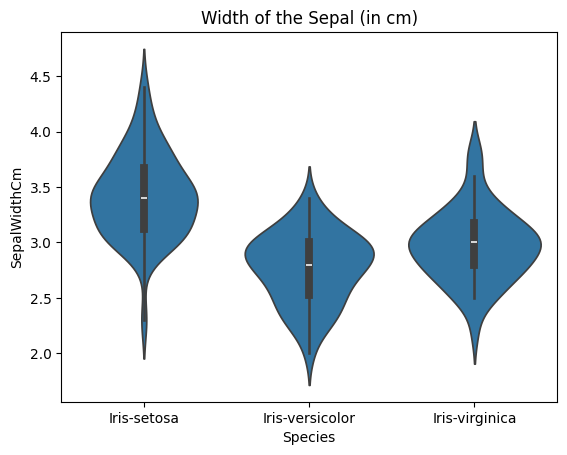

In [46]:
sns.violinplot(x='Species', y='SepalWidthCm', data=df).set_title('Width of the Sepal (in cm)')

Text(0.5, 1.0, 'Length of the Petal (in cm)')

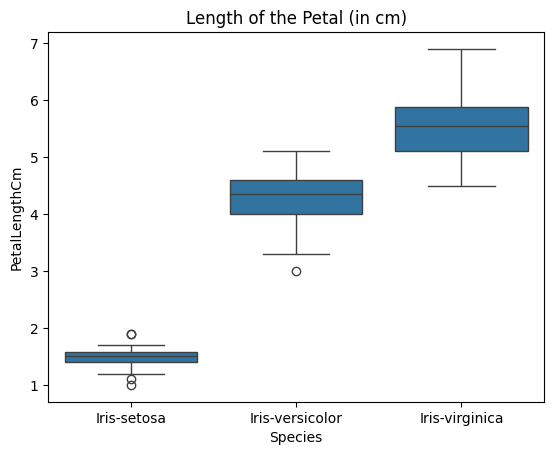

In [47]:
sns.boxplot(x='Species', y='PetalLengthCm', data=df).set_title('Length of the Petal (in cm)')

Text(0.5, 1.0, 'Width of the Petal (in cm)')

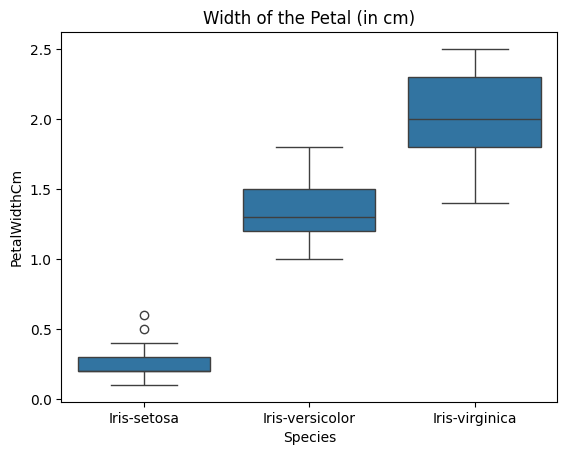

In [48]:
sns.boxplot(x='Species', y='PetalWidthCm', data=df).set_title('Width of the Petal (in cm)')

C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Width of the Petal (in cm)')

C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


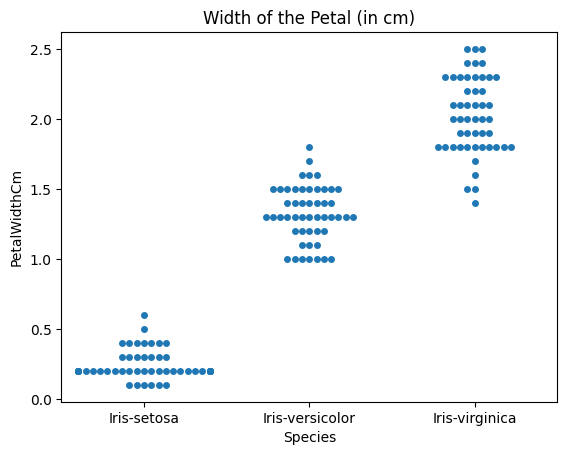

In [49]:
sns.swarmplot(x='Species', y='PetalWidthCm', data=df).set_title('Width of the Petal (in cm)')

Text(0.5, 1.0, 'Width of the Petal (in cm)')

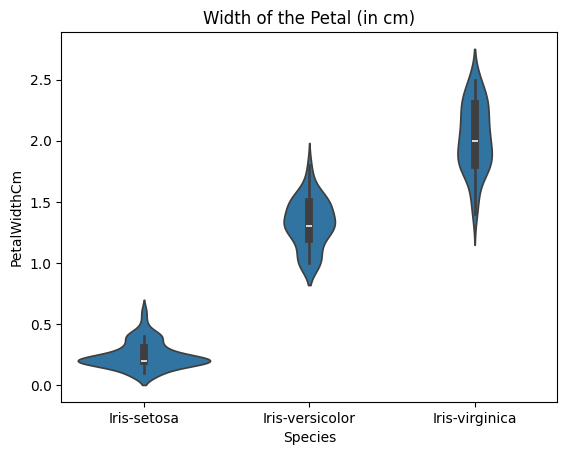

In [50]:
sns.violinplot(x='Species', y='PetalWidthCm', data=df).set_title('Width of the Petal (in cm)')

In [51]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [32]:
#  Feature / Target Split  
X = df.drop("Species", axis=1).values
y = df["Species"].values

In [31]:
#  Normalize Features
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)

In [30]:
# Train/Test Split 
X_train, X_test, y_train, y_test = train_test_split( 
    X_scaled, y, test_size=0.3, random_state=42, stratify=y 
)

In [29]:
#  KNN with different K values
k_range = range(1, 21)
accuracies = [] 
for k in k_range: 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test) 
    acc = accuracy_score(y_test, y_pred) 
    accuracies.append(acc)

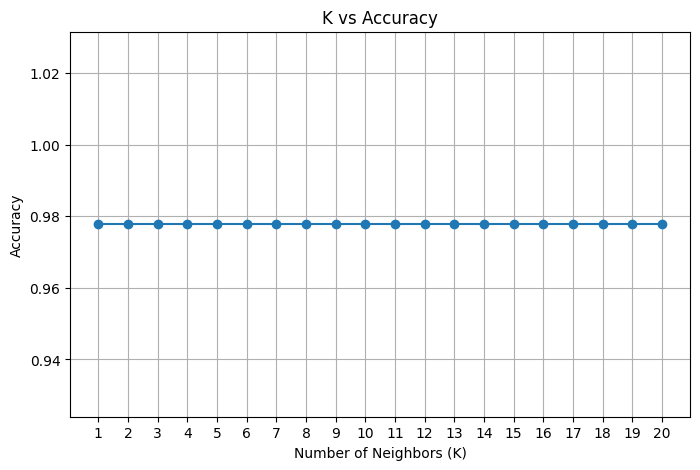


Best K: 1 with Accuracy = 0.9778


In [26]:
# Plot accuracy vs K 
plt.figure(figsize=(8,5)) 
plt.plot(k_range, accuracies, marker="o")
plt.title("K vs Accuracy") 
plt.xlabel("Number of Neighbors (K)") 
plt.ylabel("Accuracy")
plt.xticks(k_range) 
plt.grid(True) 
plt.show() 
best_k = k_range[np.argmax(accuracies)] 
print(f"\nBest K: {best_k} with Accuracy = {max(accuracies):.4f}")


Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45


Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


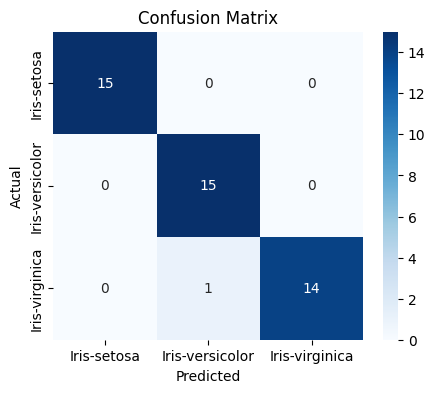

In [28]:
# Train Final Model
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train) 
y_pred_final = knn_final.predict(X_test)
# Evaluation 
print("\nClassification Report:\n", classification_report(y_test, y_pred_final)) 
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_final))
# Heatmap of confusion matrix 
plt.figure(figsize=(5,4)) 
sns.heatmap(confusion_matrix(y_test, y_pred_final), annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y)) 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted") 
plt.ylabel("Actual")
plt.show()

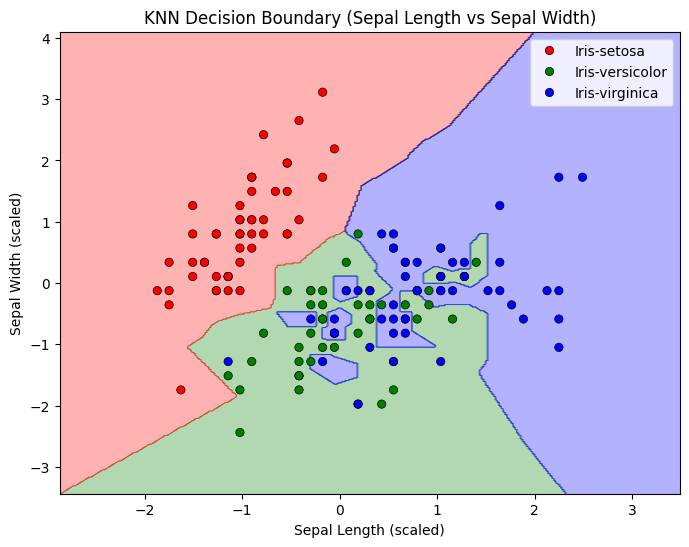

In [39]:
# Decision Boundary Visualization (Fixed)
# Take only 2 features for visualization
X_vis = df[["SepalLengthCm", "SepalWidthCm"]].values
y_vis = df["Species"].values

# Encode string labels into numbers
le = LabelEncoder()
y_vis_encoded = le.fit_transform(y_vis)

# Scale features
X_vis_scaled = scaler.fit_transform(X_vis)
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis_scaled, y_vis_encoded, test_size=0.3, random_state=42, stratify=y_vis_encoded
)

# Train KNN for visualization
knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_vis, y_train_vis)

# Create meshgrid
x_min, x_max = X_vis_scaled[:, 0].min()-1, X_vis_scaled[:, 0].max()+1
y_min, y_max = X_vis_scaled[:, 1].min()-1, X_vis_scaled[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict numeric labels for each grid point
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Colors
colors = ("red", "green", "blue")
cmap = ListedColormap(colors[:len(le.classes_)])

# Plot decision boundary
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)

# Scatter plot of actual points
sns.scatterplot(x=X_vis_scaled[:,0], y=X_vis_scaled[:,1],
                hue=le.inverse_transform(y_vis_encoded), palette=colors, edgecolor="k")

plt.title("KNN Decision Boundary (Sepal Length vs Sepal Width)")
plt.xlabel("Sepal Length (scaled)")
plt.ylabel("Sepal Width (scaled)")
plt.show()
